In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt;
from scipy.stats import moment
import mpmath
import pandas as pd 
#from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


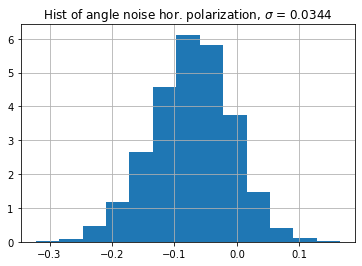

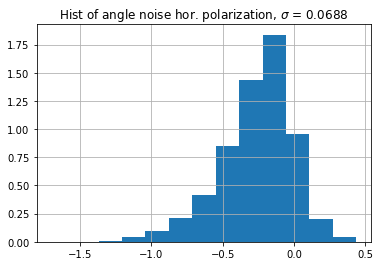

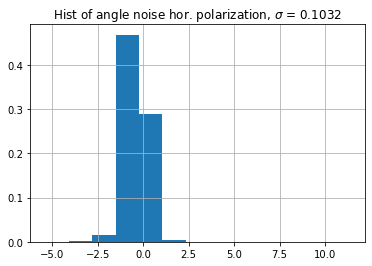

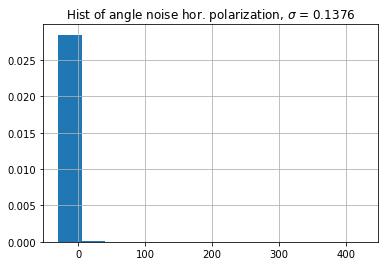

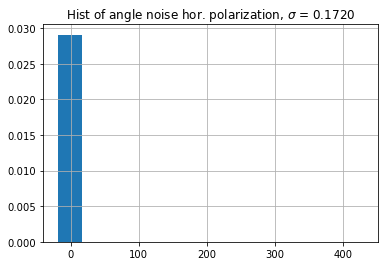

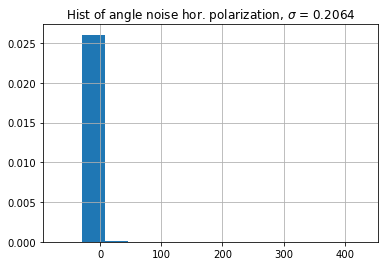

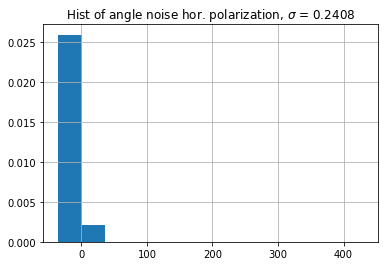

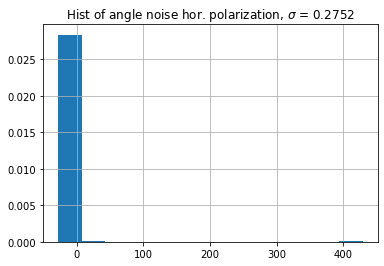

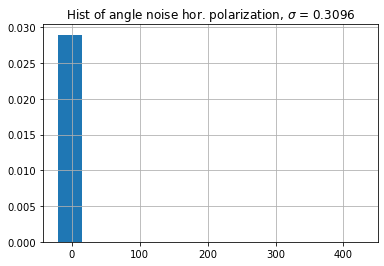

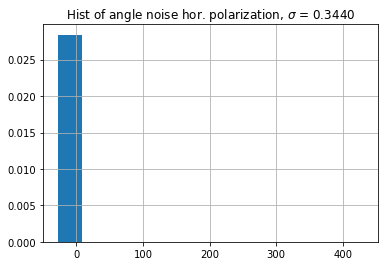

In [3]:
#horizontal
eps1 = 1
tanTH1 = 0
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epr0 = 1
h = 1
k = 2*np.pi/lambd
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = np.arange(0.0344,0.35,0.0344)
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#horizontal
G1=sqrt(epsC1)*sin(tetha)-sqrt(epsC2-epsC1*(cos(tetha))**2)
G2=sqrt(epsC1)*sin(tetha)+sqrt(epsC2-epsC1*(cos(tetha))**2)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 5000
ran = np.random.normal(0,1,(2,N))
#stats output matrix
mx = np.zeros(len(alf))#mean
varx = np.zeros(len(alf))#var
m3 = np.zeros(len(alf))#3 moment
m4 = np.zeros(len(alf))#4 moment
gxy = np.zeros(N)#
fxy = np.zeros(N)
Es1 = np.zeros((N,2))
F1 = np.zeros((N,2))
psi = np.zeros((N,2))
L0 = np.zeros(N)
for i in range(len(ksi)):
    eps=(ksi[i]/sqrt(2))*(ran)
    eps1 = np.random.normal(0,1,(2,N))
    eps[0,:]=(ksi[i]/sqrt(2))*(eps1[0,:]/sqrt(var(eps1[0,:])))
    eps[1,:]=(ksi[i]/sqrt(2))*(eps1[1,:]/sqrt(var(eps1[1,:])))
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk[i]+epsx
    y=yk[i]+epsy
    dt=0.0000174 #step in radians
    te1=[tetha-dt, tetha+dt]
    L0 = np.zeros(N)
    for n in range(N):
        L0 = L0.reshape(-1, 1)
        gxy[n]=(x[n]**2+y[n]**2)
        fxy[n]=np.arctan2(y[n],x[n])
        if fxy[n]<0: 
            fxy[n]=fxy[n]+2*pi   
        Es1[n,:]=sqrt(1+gxy[n]**2+2*gxy[n]*cos(4*k*h*sin(te1)-2*fxy[n]))
        F1[n,:]=np.arctan2(-sin(2*k*h*sin(te1))+gxy[n]*sin(2*k*h*sin(te1)+2*fxy[n]), cos(2*k*h*sin(te1))+gxy[n]*cos(2*k*h*sin(te1) + 2*fxy[n]))
        #F1(n,:)=atan2(-sin(2*k*h.*sin(te1))+gxy(n).*sin( 2*k*h.*sin(te1)+2.*fxy(n)),cos(2*k*h.*sin(te1))+gxy(n).*cos( 2*k*h.*sin(te1)+2.*fxy(n))  )
        if F1[n,0]<0: 
            F1[n,0]=F1[n,0] + 2*pi
        if F1[n,1]<0: 
            F1[n,1] = F1[n,1] + 2*pi
        psi[n,:]=np.arctan2(Es1[n,:]*sin(F1[n,:])+2*sqrt(gxy[n])*sin(fxy[n]), Es1[n,:]*cos(F1[n,:])+2*sqrt(gxy[n])*cos(fxy[n]))
        #psi(n,:)=atan2(Es1(n,:).*sin(F1(n,:))+2.*sqrt(gxy(n)).*sin(fxy(n)),Es1(n,:).*cos(F1(n,:))+2.*sqrt(gxy(n)).*cos(fxy(n)) );
        
        if psi[n,0] < 0: 
            psi[n,0] = psi[n,0] + 2*pi
        if psi[n,1] < 0:
            psi[n,1] = psi[n,1] +2*pi
        L0[n] = (0.03/(4*pi))*(psi[n,1]-psi[n,0])/(2*dt)
    mx[i]=np.mean(L0)
    varx[i]=np.var(L0)
    m3[i]=moment(L0,3)
    m4[i]=moment(L0,4)
    L0 = L0[~np.isnan(L0)]
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(L0, 13, density=True)
    plt.grid(True)
    plt.title(f'Hist of angle noise hor. polarization, $\sigma$ = {sko[i]:.4f}')
    #stat for abs
   








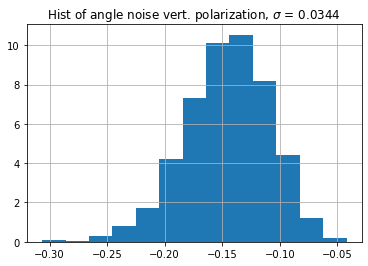

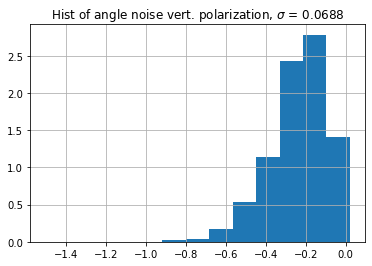

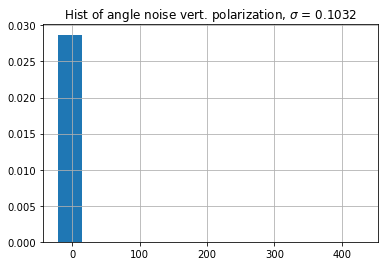

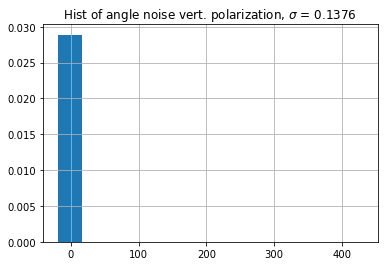

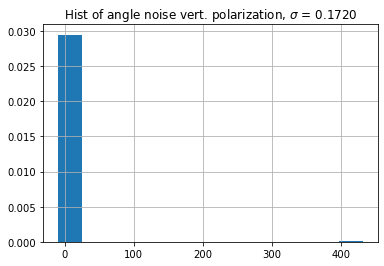

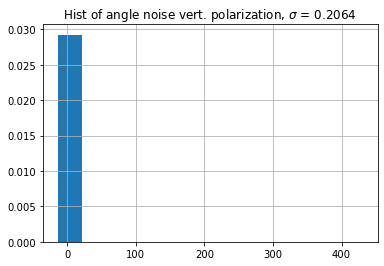

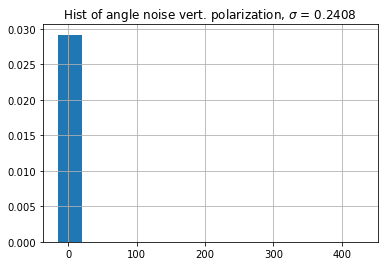

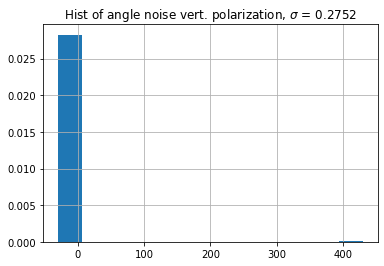

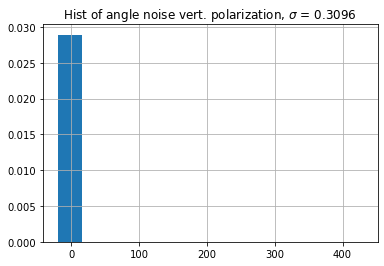

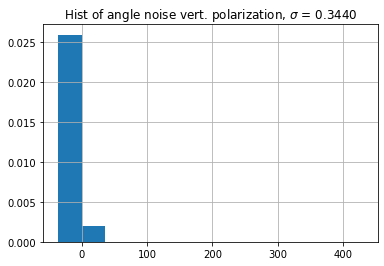

In [4]:
#vertical
eps1 = 1
tanTH1 = 0
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epr0 = 1
h = 1
k = 2*np.pi/lambd
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = np.arange(0.0344,0.35,0.0344)
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#vertical
G1=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )-epsC2*sin(tetha)
G2=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )+epsC2*sin(tetha)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 5000
ran = np.random.normal(0,1,(2,N))
#stats output matrix
mx = np.zeros(len(alf))#mean
varx = np.zeros(len(alf))#var
m3 = np.zeros(len(alf))#3 moment
m4 = np.zeros(len(alf))#4 moment
gxy = np.zeros(N)#
fxy = np.zeros(N)
Es1 = np.zeros((N,2))
F1 = np.zeros((N,2))
psi = np.zeros((N,2))
L0 = np.zeros(N)
for i in range(len(ksi)):
    eps=(ksi[i]/sqrt(2))*(ran)
    eps1 = np.random.normal(0,1,(2,N))
    eps[0,:]=(ksi[i]/sqrt(2))*(eps1[0,:]/sqrt(var(eps1[0,:])))
    eps[1,:]=(ksi[i]/sqrt(2))*(eps1[1,:]/sqrt(var(eps1[1,:])))
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk[i]+epsx
    y=yk[i]+epsy
    dt=0.0000174 #шаг для производной радианах
    te1=[tetha-dt, tetha+dt]
    L0 = np.zeros(N)
    for n in range(N):
        L0 = L0.reshape(-1, 1)
        gxy[n]=(x[n]**2+y[n]**2)
        fxy[n]=np.arctan2(y[n],x[n])
        if fxy[n]<0: 
            fxy[n]=fxy[n]+2*pi   
        Es1[n,:]=sqrt(1+gxy[n]**2+2*gxy[n]*cos(4*k*h*sin(te1)-2*fxy[n]))
        F1[n,:]=np.arctan2(-sin(2*k*h*sin(te1))+gxy[n]*sin(2*k*h*sin(te1)+2*fxy[n]), cos(2*k*h*sin(te1))+gxy[n]*cos(2*k*h*sin(te1) + 2*fxy[n]))
        #F1(n,:)=atan2(-sin(2*k*h.*sin(te1))+gxy(n).*sin( 2*k*h.*sin(te1)+2.*fxy(n)),cos(2*k*h.*sin(te1))+gxy(n).*cos( 2*k*h.*sin(te1)+2.*fxy(n))  )
        if F1[n,0]<0: 
            F1[n,0]=F1[n,0] + 2*pi
        if F1[n,1]<0: 
            F1[n,1] = F1[n,1] + 2*pi
        psi[n,:]=np.arctan2(Es1[n,:]*sin(F1[n,:])+2*sqrt(gxy[n])*sin(fxy[n]), Es1[n,:]*cos(F1[n,:])+2*sqrt(gxy[n])*cos(fxy[n]))
        #psi(n,:)=atan2(Es1(n,:).*sin(F1(n,:))+2.*sqrt(gxy(n)).*sin(fxy(n)),Es1(n,:).*cos(F1(n,:))+2.*sqrt(gxy(n)).*cos(fxy(n)) );
        
        if psi[n,0] < 0: 
            psi[n,0] = psi[n,0] + 2*pi
        if psi[n,1] < 0:
            psi[n,1] = psi[n,1] +2*pi
        L0[n] = (0.03/(4*pi))*(psi[n,1]-psi[n,0])/(2*dt)
    mx[i]=np.mean(L0)
    varx[i]=np.var(L0)
    m3[i]=moment(L0,3)
    m4[i]=moment(L0,4)
    L0 = L0[~np.isnan(L0)]
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(L0, 13, density=True)
    plt.grid(True)
    plt.title(f'Hist of angle noise vert. polarization, $\sigma$ = {sko[i]:.4f}')
    #stat for abs
   








Text(0.5, 1.0, 'Variety vs elevation, hor. polarization')

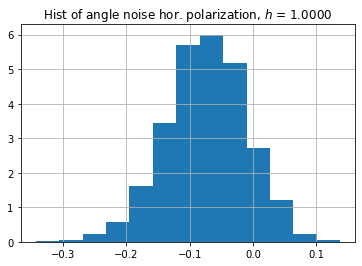

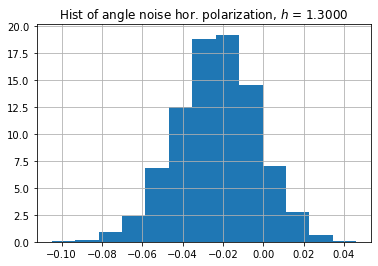

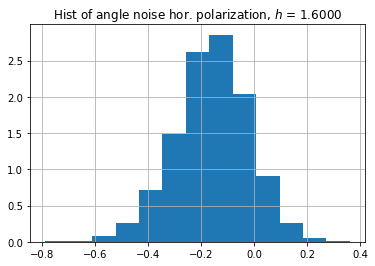

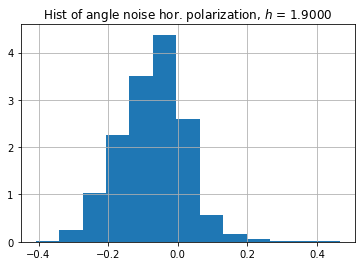

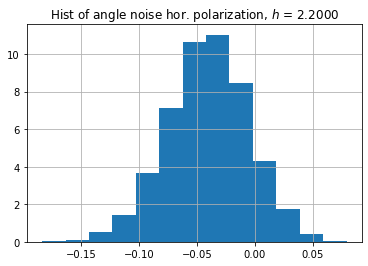

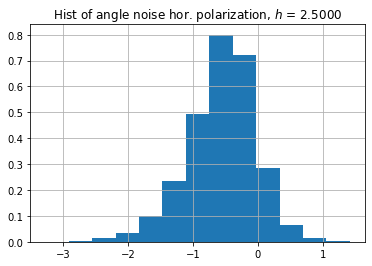

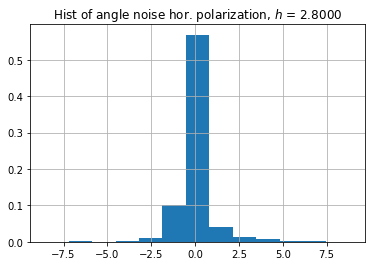

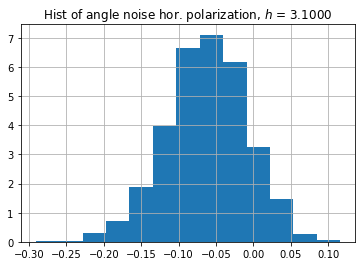

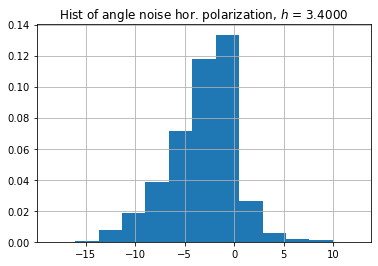

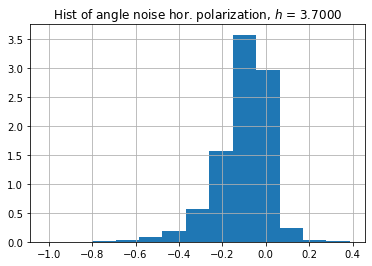

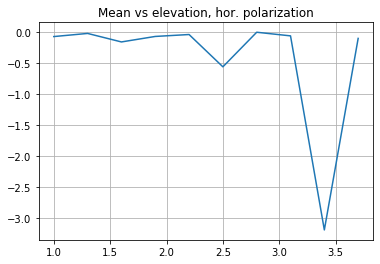

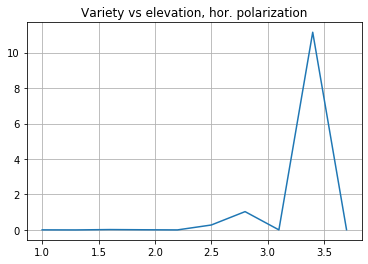

In [5]:
#horizontal
eps1 = 1
tanTH1 = 0
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epr0 = 1
h = np.arange(1,4,0.3)
k = 2*np.pi/lambd
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = 0.0344
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#horizontal
G1=sqrt(epsC1)*sin(tetha)-sqrt(epsC2-epsC1*(cos(tetha))**2)
G2=sqrt(epsC1)*sin(tetha)+sqrt(epsC2-epsC1*(cos(tetha))**2)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 5000
ran = np.random.normal(0,1,(2,N))
#stats output matrix
mx = np.zeros(len(h))#mean
varx = np.zeros(len(h))#var
m3 = np.zeros(len(h))#3 moment
m4 = np.zeros(len(h))#4 moment
gxy = np.zeros(N)#
fxy = np.zeros(N)
Es1 = np.zeros((N,2))
F1 = np.zeros((N,2))
psi = np.zeros((N,2))
L0 = np.zeros(N)
eps1 = np.random.normal(0,1,(2,N))
for i in range(len(h)):
    eps=(ksi/sqrt(2))*(ran)
   
    eps[0,:]=(ksi/sqrt(2))*(eps1[0,:]/sqrt(var(eps1[0,:])))
    eps[1,:]=(ksi/sqrt(2))*(eps1[1,:]/sqrt(var(eps1[1,:])))
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk+epsx
    y=yk+epsy
    dt=0.0000174
    te1=[tetha-dt, tetha+dt]
    L0 = np.zeros(N)
    
    for n in range(N):
        L0 = L0.reshape(-1, 1)
        gxy[n]=(x[n]**2+y[n]**2)
        fxy[n]=np.arctan2(y[n],x[n])
        if fxy[n]<0: 
            fxy[n]=fxy[n]+2*pi   
        Es1[n,:]=sqrt(1+gxy[n]**2+2*gxy[n]*cos(4*k*h[i]*sin(te1)-2*fxy[n]))
        F1[n,:]=np.arctan2(-sin(2*k*h[i]*sin(te1))+gxy[n]*sin(2*k*h[i]*sin(te1)+2*fxy[n]), cos(2*k*h[i]*sin(te1))+gxy[n]*cos(2*k*h[i]*sin(te1) + 2*fxy[n]))
        #F1(n,:)=atan2(-sin(2*k*h.*sin(te1))+gxy(n).*sin( 2*k*h.*sin(te1)+2.*fxy(n)),cos(2*k*h.*sin(te1))+gxy(n).*cos( 2*k*h.*sin(te1)+2.*fxy(n))  )
        if F1[n,0]<0: 
            F1[n,0]=F1[n,0] + 2*pi
        if F1[n,1]<0: 
            F1[n,1] = F1[n,1] + 2*pi
        psi[n,:]=np.arctan2(Es1[n,:]*sin(F1[n,:])+2*sqrt(gxy[n])*sin(fxy[n]), Es1[n,:]*cos(F1[n,:])+2*sqrt(gxy[n])*cos(fxy[n]))
        #psi(n,:)=atan2(Es1(n,:).*sin(F1(n,:))+2.*sqrt(gxy(n)).*sin(fxy(n)),Es1(n,:).*cos(F1(n,:))+2.*sqrt(gxy(n)).*cos(fxy(n)) );
        
        if psi[n,0] < 0: 
            psi[n,0] = psi[n,0] + 2*pi
        if psi[n,1] < 0:
            psi[n,1] = psi[n,1] +2*pi
        L0[n] = (0.03/(4*pi))*(psi[n,1]-psi[n,0])/(2*dt)
    mx[i]=np.mean(L0)
    varx[i]=np.var(L0)
    m3[i]=moment(L0,3)
    m4[i]=moment(L0,4)
    L0 = L0[~np.isnan(L0)]
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(L0, 13, density=True)
    plt.grid(True)
    plt.title(f'Hist of angle noise hor. polarization, $h$ = {h[i]:.4f}')
    #stat for abs
fig = plt.figure()#abs
plt.plot(h,mx)
plt.grid(True)
plt.title('Mean vs elevation, hor. polarization')   
fig = plt.figure()#abs
plt.plot(h,varx)
plt.grid(True)
plt.title('Variety vs elevation, hor. polarization')   




Text(0.5, 1.0, 'Variance vs elevation, vert. polarization')

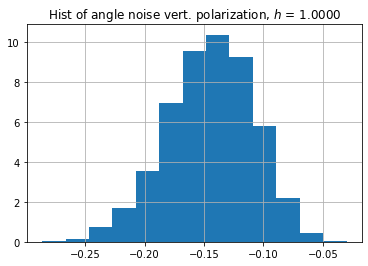

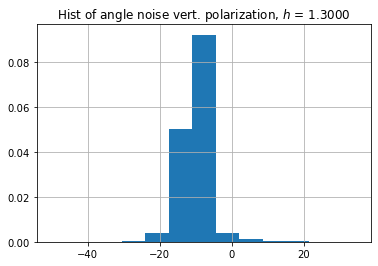

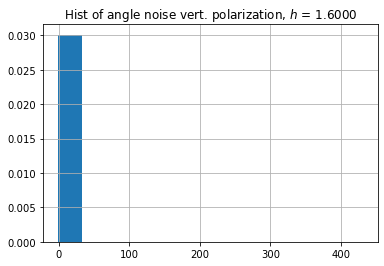

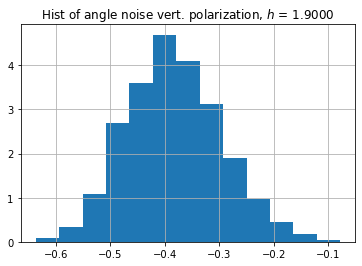

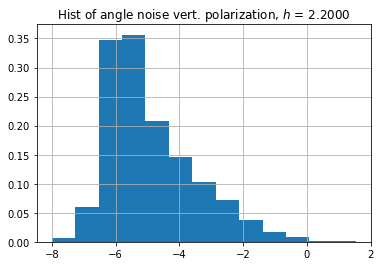

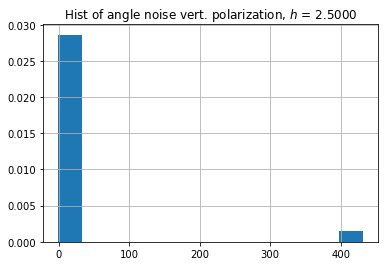

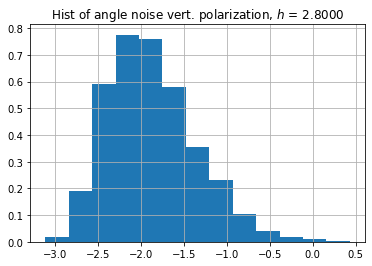

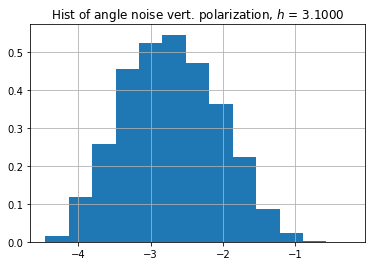

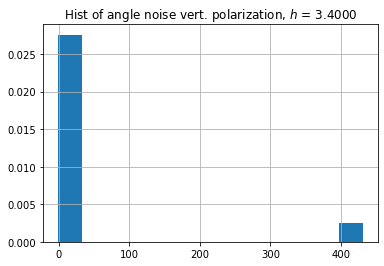

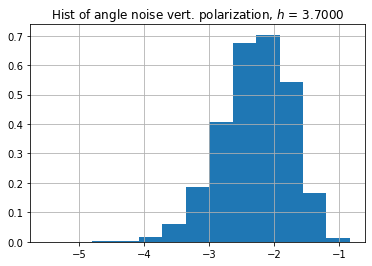

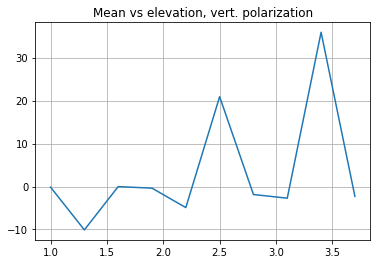

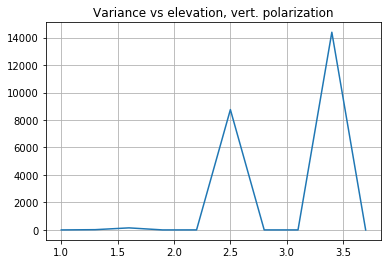

In [6]:
#vertical_h
eps1 = 1
tanTH1 = 0
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epr0 = 1
h = np.arange(1,4,0.3)
k = 2*np.pi/lambd
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = 0.0344
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#vertical
G1=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )-epsC2*sin(tetha)
G2=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )+epsC2*sin(tetha)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 5000
ran = np.random.normal(0,1,(2,N))
#stats output matrix
mx = np.zeros(len(h))#mean
varx = np.zeros(len(h))#var
m3 = np.zeros(len(h))#3 moment
m4 = np.zeros(len(h))#4 moment
gxy = np.zeros(N)#
fxy = np.zeros(N)
Es1 = np.zeros((N,2))
F1 = np.zeros((N,2))
psi = np.zeros((N,2))
L0 = np.zeros(N)
eps1 = np.random.normal(0,1,(2,N))
for i in range(len(h)):
    eps=(ksi/sqrt(2))*(ran)
   
    eps[0,:]=(ksi/sqrt(2))*(eps1[0,:]/sqrt(var(eps1[0,:])))
    eps[1,:]=(ksi/sqrt(2))*(eps1[1,:]/sqrt(var(eps1[1,:])))
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk+epsx
    y=yk+epsy
    dt=0.0000174 #шаг для производной радианах
    te1=[tetha-dt, tetha+dt]
    L0 = np.zeros(N)
    
    for n in range(N):
        L0 = L0.reshape(-1, 1)
        gxy[n]=(x[n]**2+y[n]**2)
        fxy[n]=np.arctan2(y[n],x[n])
        if fxy[n]<0: 
            fxy[n]=fxy[n]+2*pi   
        Es1[n,:]=sqrt(1+gxy[n]**2+2*gxy[n]*cos(4*k*h[i]*sin(te1)-2*fxy[n]))
        F1[n,:]=np.arctan2(-sin(2*k*h[i]*sin(te1))+gxy[n]*sin(2*k*h[i]*sin(te1)+2*fxy[n]), cos(2*k*h[i]*sin(te1))+gxy[n]*cos(2*k*h[i]*sin(te1) + 2*fxy[n]))
        #F1(n,:)=atan2(-sin(2*k*h.*sin(te1))+gxy(n).*sin( 2*k*h.*sin(te1)+2.*fxy(n)),cos(2*k*h.*sin(te1))+gxy(n).*cos( 2*k*h.*sin(te1)+2.*fxy(n))  )
        if F1[n,0]<0: 
            F1[n,0]=F1[n,0] + 2*pi
        if F1[n,1]<0: 
            F1[n,1] = F1[n,1] + 2*pi
        psi[n,:]=np.arctan2(Es1[n,:]*sin(F1[n,:])+2*sqrt(gxy[n])*sin(fxy[n]), Es1[n,:]*cos(F1[n,:])+2*sqrt(gxy[n])*cos(fxy[n]))
        #psi(n,:)=atan2(Es1(n,:).*sin(F1(n,:))+2.*sqrt(gxy(n)).*sin(fxy(n)),Es1(n,:).*cos(F1(n,:))+2.*sqrt(gxy(n)).*cos(fxy(n)) );
        
        if psi[n,0] < 0: 
            psi[n,0] = psi[n,0] + 2*pi
        if psi[n,1] < 0:
            psi[n,1] = psi[n,1] +2*pi
        L0[n] = (0.03/(4*pi))*(psi[n,1]-psi[n,0])/(2*dt)
    mx[i]=np.mean(L0)
    varx[i]=np.var(L0)
    m3[i]=moment(L0,3)
    m4[i]=moment(L0,4)
    L0 = L0[~np.isnan(L0)]
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(L0, 13, density=True)
    plt.grid(True)
    plt.title(f'Hist of angle noise vert. polarization, $h$ = {h[i]:.4f}')
    #stat for abs
fig = plt.figure()#abs
plt.plot(h,mx)
plt.grid(True)
plt.title('Mean vs elevation, vert. polarization')   
fig = plt.figure()#abs
plt.plot(h,varx)
plt.grid(True)
plt.title('Variance vs elevation, vert. polarization')  
